In [1]:
import statistics
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, ShuffleSplit, GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

In [2]:
df = pd.read_csv("NBAChampion.csv")
print(list(df.columns))

['Season', 'Team/Season', 'Team', 'Team ID', 'Team ID/Season', 'Conference', 'Conference/Season', 'Conference 5=> rec', 'Conference OR', 'Conference SRS', 'Conference Age', 'pre playoff odds', 'pre playoff odds rank', 'pre season odds', 'champion', 'champion share', 'make playoffs', 'top 3 conference', 'rk conference', 'overall record', 'over500 rec', 'over600 rec', '20 =< wins', '5 => rec', 'sum coach playoff games', 'sum coy shares', 'sum playoff games', 'sum champion', 'sum champion share', 'sum mvp shares', 'sum all defense', 'sum all nba', 'sum dpoy shares', 'sum smoy shares', 'sum mip shares', 'sum all stars', 'sum player L1Y cs', 'sum player L3Y cs', 'sum player L5Y cs', 'sum player L8Y cs', 'sum player L10Y cs', 'sum L3Y mvp shares ', 'sum L5Y  mvp shares', 'sum franchise L1Y cs', 'sum franchise L3Y cs', 'sum franchise L5Y cs', 'sum franchise L8Y cs', 'sum franchise L10Y cs', 'team_rating_custom', 'max_player_rating_custom', 'curr/past mvp or past fmvp', 'FG', 'FGA', 'FG%', '3P

In [3]:
data_columns = ['Conference 5=> rec', 'Conference OR', 'Conference SRS', 'Conference Age', 'pre playoff odds', 'pre playoff odds rank', 'pre season odds', 'champion', 'champion share', 'make playoffs', 'top 3 conference', 'rk conference', 'overall record', 'over500 rec', 'over600 rec', '20 =< wins', '5 => rec', 'sum coach playoff games', 'sum coy shares', 'sum playoff games', 'sum champion', 'sum champion share', 'sum mvp shares', 'sum all defense', 'sum all nba', 'sum dpoy shares', 'sum smoy shares', 'sum mip shares', 'sum all stars', 'sum player L1Y cs', 'sum player L3Y cs', 'sum player L5Y cs', 'sum player L8Y cs', 'sum player L10Y cs', 'sum L3Y mvp shares ', 'sum L5Y  mvp shares', 'sum franchise L1Y cs', 'sum franchise L3Y cs', 'sum franchise L5Y cs', 'sum franchise L8Y cs', 'sum franchise L10Y cs', 'team_rating_custom', 'max_player_rating_custom', 'curr/past mvp or past fmvp', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG_opp', 'FGA_opp', 'FG%_opp', '3P_opp', '3PA_opp', '3P%_opp', '2P_opp', '2PA_opp', '2P%_opp', 'FT_opp', 'FTA_opp', 'FT%_opp', 'ORB_opp', 'DRB_opp', 'TRB_opp', 'AST_opp', 'STL_opp', 'BLK_opp', 'TOV_opp', 'PF_opp', 'PTS_opp', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'Offense Four Factors|eFG%', 'Offense Four Factors|TOV%', 'Offense Four Factors|ORB%', 'Offense Four Factors|FT/FGA', 'Defense Four Factors|eFG%', 'Defense Four Factors|TOV%', 'Defense Four Factors|DRB%', 'Defense Four Factors|FT/FGA']

df= df.dropna(subset=data_columns)
data = df[data_columns].copy()

In [4]:
correlation_matrix = data.corr()

correlation_threshold = .9

columns_to_remove = set()
print("Columns to be Removed:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > correlation_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            if feature_i not in columns_to_remove:
                columns_to_remove.add(feature_j)
                print(f"{feature_j} (correlated with {feature_i}): {correlation:.2f}")

data_filtered = data.drop(columns=columns_to_remove)

Columns to be Removed:
Conference SRS (correlated with Conference OR): 0.95
Age (correlated with Conference Age): 0.92
over500 rec (correlated with overall record): 0.94
team_rating_custom (correlated with overall record): 0.94
W (correlated with overall record): 0.97
L (correlated with overall record): -0.95
PW (correlated with overall record): 0.94
PL (correlated with overall record): -0.92
MOV (correlated with overall record): 0.96
SRS (correlated with overall record): 0.96
NRtg (correlated with overall record): 0.95
sum champion share (correlated with sum playoff games): 0.94
sum player L8Y cs (correlated with sum playoff games): 0.90
sum player L10Y cs (correlated with sum playoff games): 0.92
sum all stars (correlated with sum all nba): 0.91
sum franchise L1Y cs (correlated with sum player L1Y cs): 0.95
sum player L5Y cs (correlated with sum player L3Y cs): 0.96
sum player L8Y cs (correlated with sum player L3Y cs): 0.92
sum player L10Y cs (correlated with sum player L3Y cs): 0.9

<Axes: xlabel='W', ylabel='overall record'>

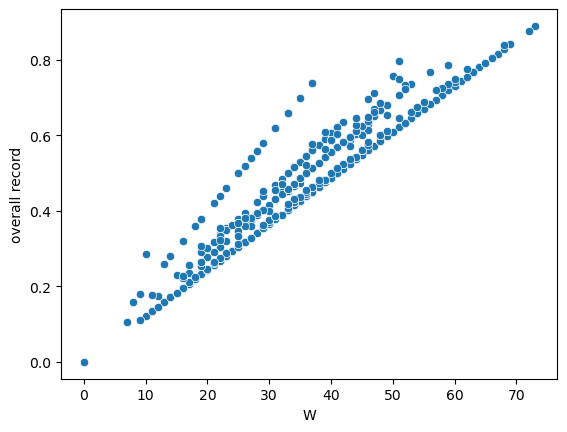

In [5]:
import seaborn as sns

sns.scatterplot(data=data, x='W', y='overall record')

In [6]:
print("Columns in data_filtered:")
print(", ".join(f"'{column}'" for column in data_filtered.columns))

print("\nColumns that were removed:")
print(", ".join(f"'{removed_column}'" for removed_column in columns_to_remove))

Columns in data_filtered:
'Conference 5=> rec', 'Conference OR', 'Conference Age', 'pre playoff odds', 'pre playoff odds rank', 'pre season odds', 'champion', 'champion share', 'make playoffs', 'top 3 conference', 'rk conference', 'overall record', 'over600 rec', '20 =< wins', '5 => rec', 'sum coach playoff games', 'sum coy shares', 'sum playoff games', 'sum champion', 'sum mvp shares', 'sum all defense', 'sum all nba', 'sum dpoy shares', 'sum smoy shares', 'sum mip shares', 'sum player L1Y cs', 'sum player L3Y cs', 'sum L3Y mvp shares ', 'sum franchise L3Y cs', 'sum franchise L8Y cs', 'max_player_rating_custom', 'curr/past mvp or past fmvp', 'FG', 'FGA', 'FG%', '3P', '3P%', '2P', '2P%', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'BLK', 'PF', 'FG_opp', 'PTS_opp', 'SOS', 'ORtg', 'Pace', 'FTr', 'Defense Four Factors|FT/FGA'

Columns that were removed:
'W', 'sum player L5Y cs', 'TOV_opp', 'Offense Four Factors|FT/FGA', '3PAr', 'over500 rec', 'PTS', 'sum L5Y  mvp shares', 'SRS', '3PA_opp', '

In [7]:
features = ['Conference 5=> rec', 'Conference OR', 'Conference Age', 'pre season odds',
            'over600 rec', 'DRtg', 'top 3 conference',
            '20 =< wins', '5 => rec', 'sum coach playoff games', 'sum coy shares', 'sum playoff games', 'sum champion', 'sum mvp shares', 'team_rating_custom','Age',
            'sum all defense', 'sum all nba', 'sum dpoy shares', 'sum smoy shares', 'sum mip shares', 'Offense Four Factors|eFG%',
             'sum L3Y mvp shares ', 'sum franchise L1Y cs', 'sum franchise L3Y cs', 'sum franchise L8Y cs', 'max_player_rating_custom', 
            'FG', 'FGA', 'FG%', '3P', '3P%', '2P', '2P%', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'BLK', 'PF', 'FG_opp', 'PTS_opp', 'SOS', 'ORtg', 'Pace', 'FTr', 'Defense Four Factors|eFG%']

num_features = len(features)

print(f"Number of features: {num_features}")

Number of features: 49


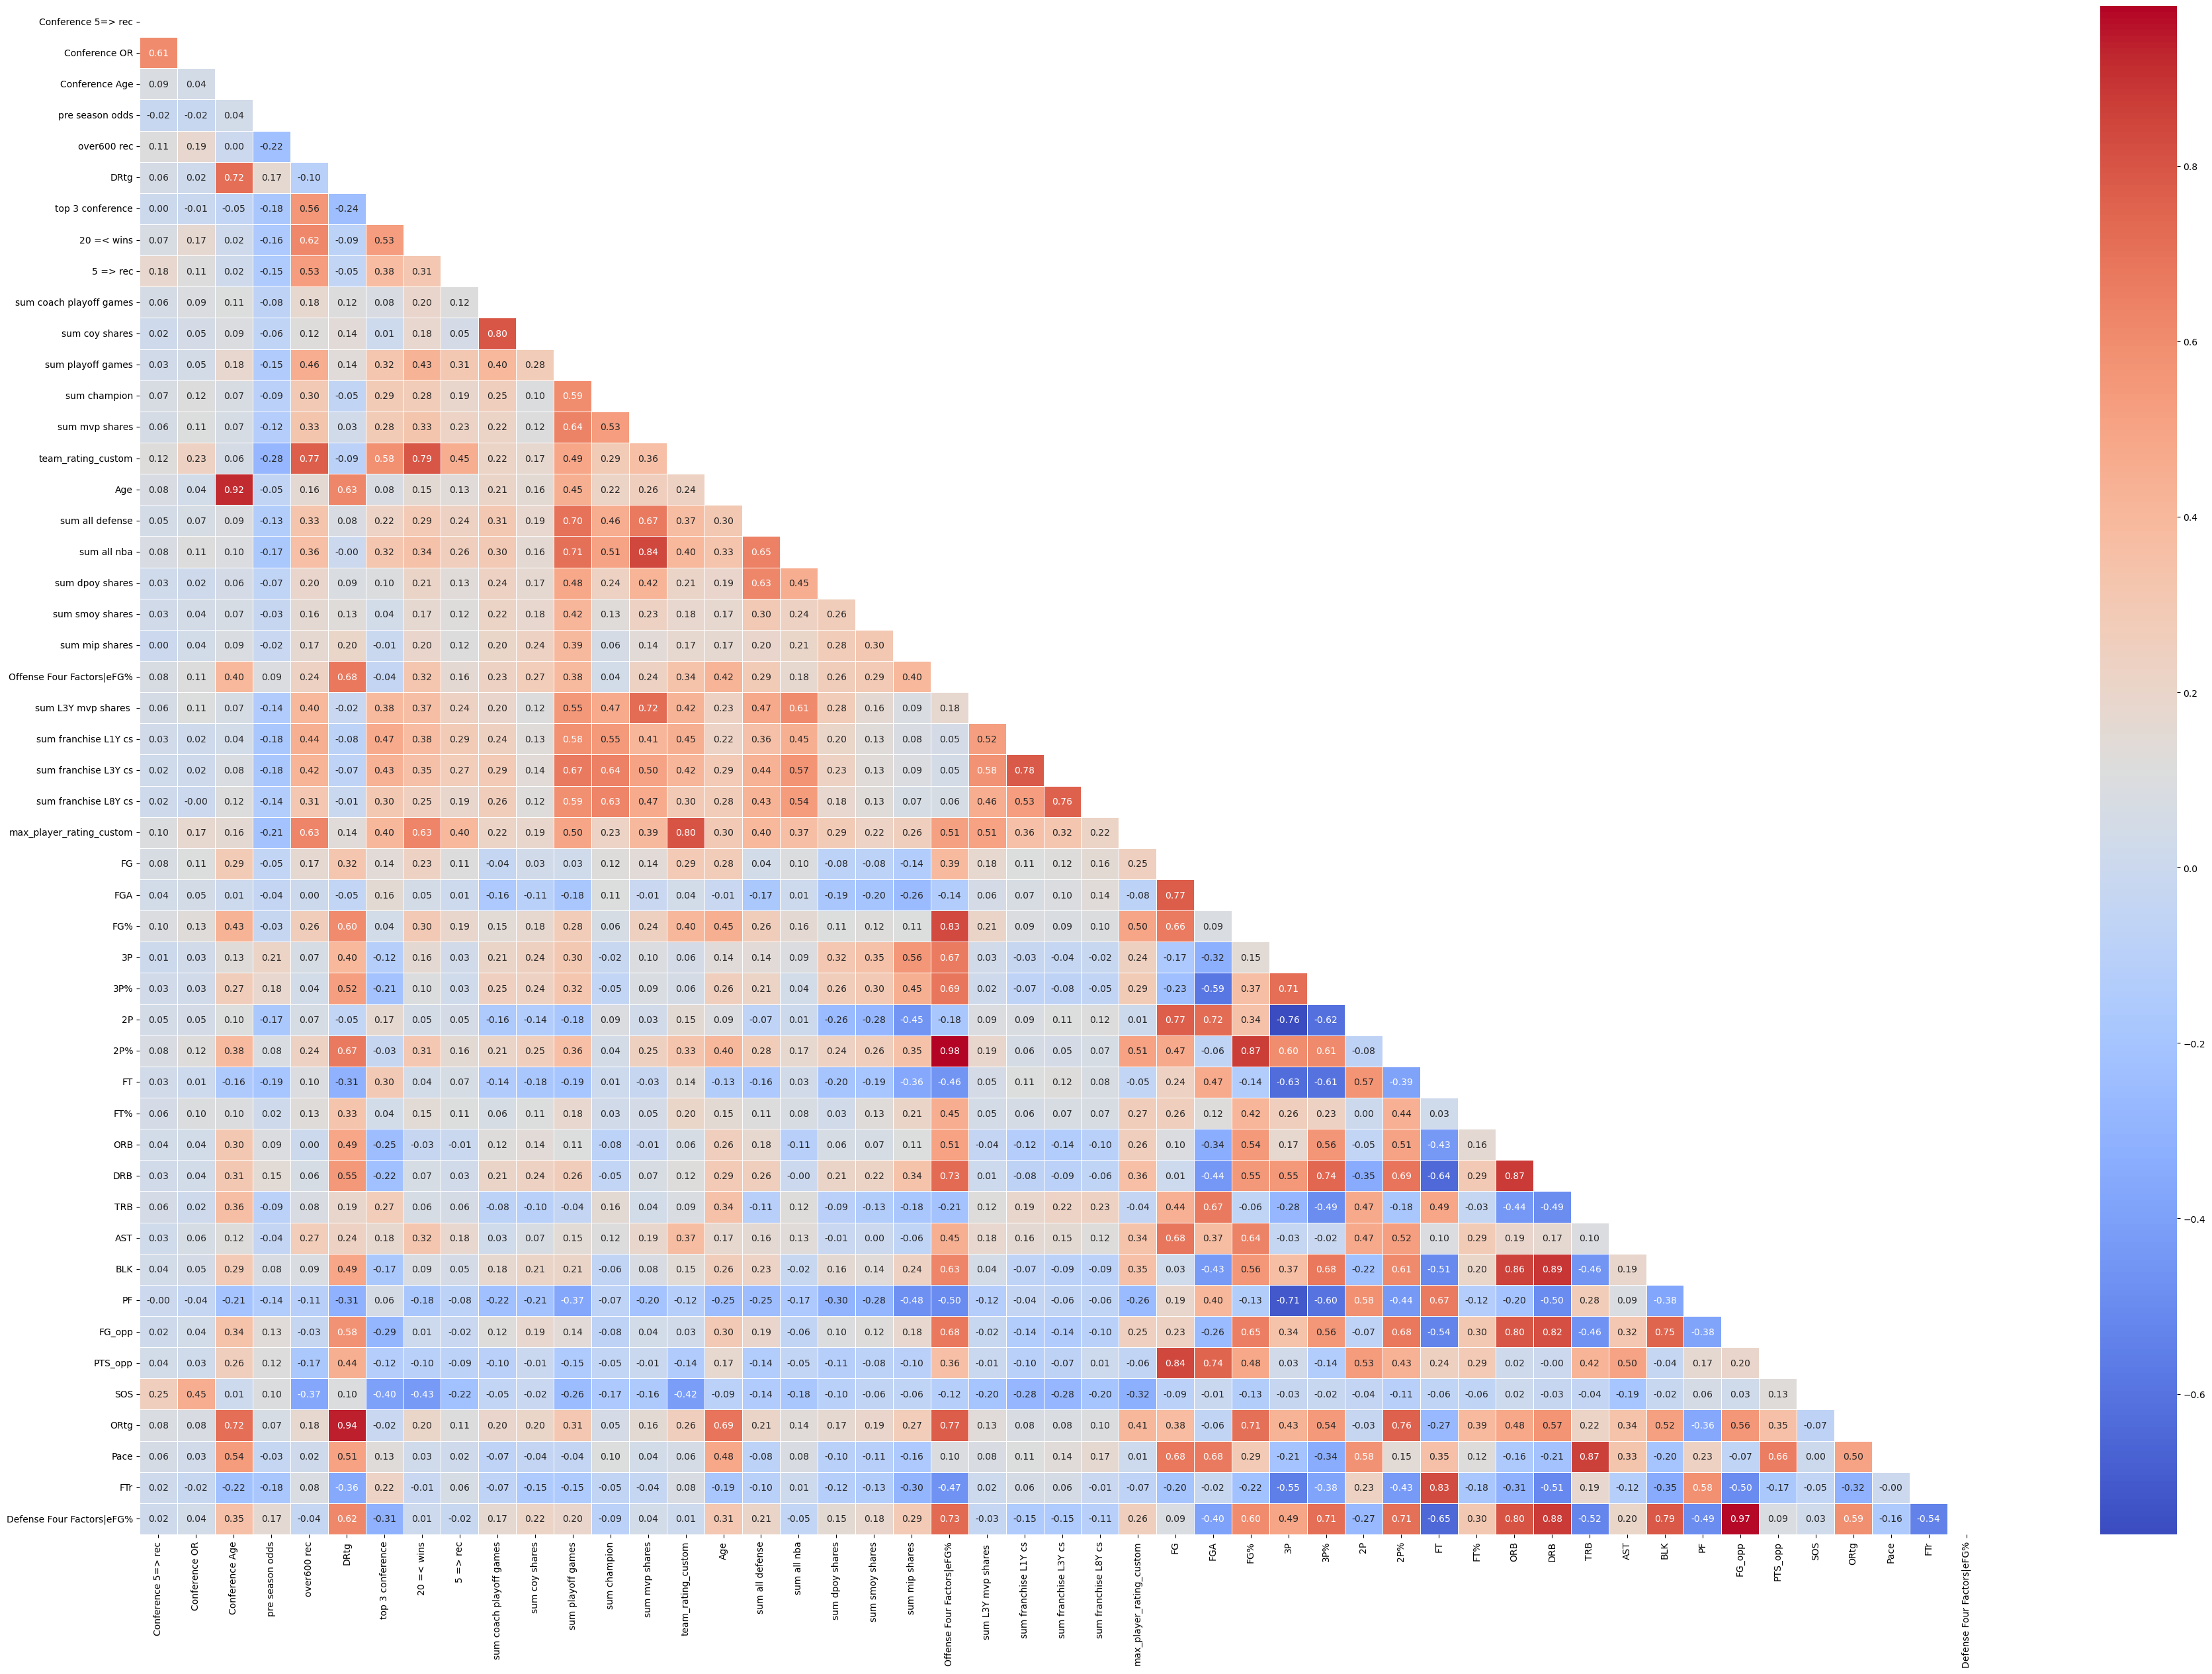

In [8]:
selected_features_data = data[features]
correlation_matrix = selected_features_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(45, 30))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask)
plt.show()

In [9]:
df[(df["Season"] > 2022) & (df["Season"]<2024)]

,Season,Team/Season,Team,Team ID,Team ID/Season,Conference,Conference/Season,Conference 5=> rec,Conference OR,Conference SRS,...,3PAr,TS%,Offense Four Factors|eFG%,Offense Four Factors|TOV%,Offense Four Factors|ORB%,Offense Four Factors|FT/FGA,Defense Four Factors|eFG%,Defense Four Factors|TOV%,Defense Four Factors|DRB%,Defense Four Factors|FT/FGA
30,2023,Milwaukee Bucks 2023,Milwaukee Bucks,3,3 2023,East,East 2023,0.492699,0.515679,0.452,...,0.446,0.583,0.555,12.7,25.0,0.184,0.520,10.4,77.8,0.175
31,2023,Boston Celtics 2023,Boston Celtics,6,6 2023,East,East 2023,0.492699,0.515679,0.452,...,0.480,0.600,0.566,12.0,22.1,0.197,0.528,11.3,78.5,0.180
32,2023,Philadelphia 76ers 2023,Philadelphia 76ers,2,2 2023,East,East 2023,0.492699,0.515679,0.452,...,0.389,0.608,0.563,12.6,21.6,0.250,0.541,13.0,77.2,0.217
33,2023,Denver Nuggets 2023,Denver Nuggets,1,1 2023,West,West 2023,0.495528,0.504878,-0.452,...,0.361,0.601,0.573,13.1,24.8,0.194,0.543,12.2,76.4,0.201
34,2023,Memphis Grizzlies 2023,Memphis Grizzlies,7,7 2023,West,West 2023,0.495528,0.504878,-0.452,...,0.372,0.570,0.540,11.7,26.5,0.190,0.526,13.1,75.9,0.206
35,2023,Cleveland Cavaliers 2023,Cleveland Cavaliers,15,15 2023,East,East 2023,0.492699,0.515679,0.452,...,0.371,0.590,0.556,12.3,23.6,0.206,0.535,14.4,76.3,0.210
36,2023,Sacramento Kings 2023,Sacramento Kings,23,23 2023,West,West 2023,0.495528,0.504878,-0.452,...,0.423,0.608,0.572,12.0,22.7,0.225,0.563,12.6,77.2,0.203
37,2023,New York Knicks 2023,New York Knicks,18,18 2023,East,East 2023,0.492699,0.515679,0.452,...,0.400,0.577,0.541,11.4,28.3,0.217,0.536,11.4,77.1,0.210
38,2023,Brooklyn Nets 2023,Brooklyn Nets,10,10 2023,East,East 2023,0.492699,0.515679,0.452,...,0.397,0.598,0.562,12.7,19.6,0.208,0.530,12.2,73.7,0.212
39,2023,Phoenix Suns 2023,Phoenix Suns,4,4 2023,West,West 2023,0.495528,0.504878,-0.452,...,0.362,0.570,0.535,12.0,26.6,0.191,0.532,12.9,76.0,0.234


### The Model

In [10]:
df = pd.read_csv("NBAChampion.csv")
df.drop(df[df['Season'] < 1990].index, inplace = True)



train = df[df["Season"] <= 2022].copy()
test = df[(df["Season"] > 2022) & (df["Season"]<2024)].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features]=sc.transform(train[features])
test[features]=sc.transform(test[features])

rf = RandomForestRegressor(n_estimators=10, random_state=102, min_samples_split=3, max_depth=5)
rf.fit(train[features], train["champion share"])

predictions = rf.predict(test[features]) 
predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
frame = df[df["make playoffs"] == 1]
frame = pd.concat([test[["Season", "Team", "champion share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted champion share"], inplace=True, ascending = [False, False])

mae1 = mean_absolute_error(frame["champion share"], frame["predicted champion share"])
mse1 = mean_squared_error(frame["champion share"], frame["predicted champion share"])
rmse1 = mean_squared_error(frame["champion share"], frame["predicted champion share"], squared=False)


print("Error Metrics: ")
print("=============================================================================\n")
print("PT MAE: ", mae1)
print("PT MSE: ", mse1)
print("PT RMSE: ", rmse1)
print("-----------------------------------------------------------------------------\n")


f_list = list(features)
f_importance = pd.Series(rf.feature_importances_, index = f_list).sort_values(ascending = False)
print("Feature Importance: ")
print("=============================================================================\n")
print(f_importance.head(20))
print("-----------------------------------------------------------------------------\n")


frame_playoff = test[test["make playoffs"] == 1]

predictions = rf.predict(frame_playoff[features])
predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=frame_playoff.index)

frame_playoff = pd.concat([frame_playoff[["Season", "Team", "champion share"]], predictions], axis=1)

frame_playoff.sort_values(["Season", "predicted champion share"], inplace=True, ascending=[False, False])

print("Full Results (Playoff Teams Only):")
print("=============================================================================\n")
print(frame_playoff.head(16))

Error Metrics: 

PT MAE:  0.1416206011187136
PT MSE:  0.04976642330582578
PT RMSE:  0.22308389297711698
-----------------------------------------------------------------------------

Feature Importance: 

top 3 conference            0.706709
team_rating_custom          0.063694
pre season odds             0.043323
over600 rec                 0.019165
sum dpoy shares             0.018356
ORB                         0.012328
max_player_rating_custom    0.012319
sum mvp shares              0.009400
FG%                         0.007029
5 => rec                    0.006747
sum smoy shares             0.006622
sum franchise L1Y cs        0.006225
Conference OR               0.006132
SOS                         0.006069
sum L3Y mvp shares          0.004749
sum coach playoff games     0.004607
sum champion                0.004360
PTS_opp                     0.004161
FTr                         0.004048
FT                          0.003771
dtype: float64
----------------------------------------

In [11]:

target_stats = df["champion share"].describe()

print("Champion Share Statistics:")
print(target_stats)
print("\nRange of Champion Share:")
print(f"Min: {target_stats['min']}")
print(f"Max: {target_stats['max']}")


Champion Share Statistics:
count    1023.000000
mean        0.168512
std         0.268164
min         0.000000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.000000
Name: champion share, dtype: float64

Range of Champion Share:
Min: 0.0
Max: 1.0


In [12]:
actual = frame_playoff.sort_values("champion share", ascending=False)
predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
actual["Rank"] = list(range(1, actual.shape[0]+1))
predicted["Predicted Rank"] = list(range(1, predicted.shape[0]+1))

ranking_results = actual.merge(predicted, on="Team").head(1) #HEAD
print("Ranking Accuracy (Champion):")
print("=============================================================================\n")
print(ranking_results.to_string())

# Average Precision Metric
def find_ap(frame_playoff):
    actual = frame_playoff.sort_values("champion share", ascending=False).head(1) #HEAD

    predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Team"] in actual["Team"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

ap = find_ap(frame_playoff)
print("=============================================================================\n")
print("PT AP Champion: ", ap)

Ranking Accuracy (Champion):

   Season_x            Team  champion share_x  predicted champion share_x  Rank  Season_y  champion share_y  predicted champion share_y  Predicted Rank
0      2023  Denver Nuggets               1.0                    0.610162     1      2023               1.0                    0.610162               2

PT AP Champion:  0.5


In [21]:
all_predictions = []
aps = []

backtest_seasons = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
combined_predictions = pd.DataFrame(columns=['predicted champion share', 'champion share', 'Team', 'Season', 'Team/Season'])

for season in backtest_seasons:
    train = df[df["Season"] < season].copy()
    test = df[df["Season"] == season].copy()

    sc = MinMaxScaler()
    sc.fit(train[features])
    train[features] = sc.transform(train[features])
    test[features] = sc.transform(test[features])

    rf.fit(train[features], train['champion share'])
    predictions = rf.predict(test[features])
    predictions_df = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
    frame_playoff = pd.concat([test[["Team", "champion share", "Season"]], predictions_df], axis=1)

    frame_playoff['Team/Season'] = frame_playoff['Team'] + ' ' + frame_playoff['Season'].astype(str)
    combined_predictions = pd.concat([combined_predictions, frame_playoff], ignore_index=True)

    all_predictions.append(frame_playoff)
    ap = find_ap(frame_playoff)
    aps.append(ap)

    reciprocal_ap = 1 / ap
    print(f"Champion AP for Season {season}: {round(ap, 2)} | Reciprocal: {round(reciprocal_ap, 2)}")

    aps.append(ap)

for idx, predictions in enumerate(all_predictions):
    season = backtest_seasons[idx]
    top5_predictions = predictions.sort_values("predicted champion share", ascending=False).head(7)
    
    print(f"\nTop 7 Predicted Teams for Season {season}:")
    print(top5_predictions[["Team", "predicted champion share", "champion share"]])

average_mae = np.mean([mean_absolute_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_mse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_rmse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"], squared=False) for fp in all_predictions])
average_ap = np.mean(aps)

last_n_seasons_aps = aps[-10:]
min_ap = np.min(last_n_seasons_aps)
max_ap = np.max(last_n_seasons_aps)

reciprocal_average_ap = 1.0 / average_ap
reciprocal_min_ap = 1.0 / min_ap
reciprocal_max_ap = 1.0 / max_ap

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"BT Average Champion AP: {round(average_ap, 2)} | Reciprocal: {round(reciprocal_average_ap, 2)}")
print(f"BT Max Champion AP: {round(min_ap, 2)} | Reciprocal: {round(reciprocal_min_ap, 2)}")
print(f"BT Min Champion AP: {round(max_ap, 2)} | Reciprocal: {round(reciprocal_max_ap, 2)}")
print("=============================================================================")





Champion AP for Season 2014: 0.82 | Reciprocal: 1.22
Champion AP for Season 2015: 0.81 | Reciprocal: 1.23
Champion AP for Season 2016: 0.72 | Reciprocal: 1.38
Champion AP for Season 2017: 0.84 | Reciprocal: 1.18
Champion AP for Season 2018: 0.83 | Reciprocal: 1.21
Champion AP for Season 2019: 0.71 | Reciprocal: 1.41
Champion AP for Season 2020: 0.6 | Reciprocal: 1.68
Champion AP for Season 2021: 0.52 | Reciprocal: 1.92
Champion AP for Season 2022: 0.67 | Reciprocal: 1.49
Champion AP for Season 2023: 0.68 | Reciprocal: 1.48

Top 7 Predicted Teams for Season 2014:
                      Team  predicted champion share  champion share
301  Oklahoma City Thunder                  0.704707          0.6250
305             Miami Heat                  0.690146          0.8125
300      San Antonio Spurs                  0.638419          1.0000
302   Los Angeles Clippers                  0.577311          0.3750
303         Indiana Pacers                  0.524910          0.6250
310        Toront

In [14]:
actual = frame_playoff.sort_values("champion share", ascending=False)
predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
actual["Rank"] = list(range(1, actual.shape[0]+1))
predicted["Predicted Rank"] = list(range(1, predicted.shape[0]+1))

ranking_results = actual.merge(predicted, on="Team").head(5)
print("Ranking Accuracy (Top 5):")
print("=============================================================================\n")
print(ranking_results.to_string())

def find_ap(frame_playoff):
    actual = frame_playoff.sort_values("champion share", ascending=False).head(5)

    predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Team"] in actual["Team"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

ap = find_ap(frame_playoff)
print("=============================================================================\n")
print("PT AP Top 5: ", ap)

Ranking Accuracy (Top 5):

                 Team  champion share_x  Season_x  predicted champion share_x            Team/Season_x  Rank  champion share_y  Season_y  predicted champion share_y            Team/Season_y  Predicted Rank
0      Denver Nuggets            1.0000      2023                    0.610162      Denver Nuggets 2023     1            1.0000      2023                    0.610162      Denver Nuggets 2023               2
1          Miami Heat            0.8125      2023                    0.142131          Miami Heat 2023     2            0.8125      2023                    0.142131          Miami Heat 2023              13
2      Boston Celtics            0.6875      2023                    0.641247      Boston Celtics 2023     3            0.6875      2023                    0.641247      Boston Celtics 2023               1
3  Los Angeles Lakers            0.5000      2023                    0.140848  Los Angeles Lakers 2023     4            0.5000      2023             

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer


df.drop(df[df['Season'] < 1990].index, inplace = True)



train = df[df["Season"] <= 2023].copy()
test = df[df["Season"] > 2023].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features]=sc.transform(train[features])
test[features]=sc.transform(test[features])

rf = RandomForestRegressor(n_estimators=10, random_state=2, min_samples_split=3, max_depth=5)
rf.fit(train[features], train["champion share"])

playoff = test[test["make playoffs"] == 1]

predictions = rf.predict(playoff[features])
predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=playoff.index)

frame_playoff = pd.concat([playoff[["Season", "Team", "champion share"]], predictions], axis=1)

frame_playoff.sort_values(["Season", "predicted champion share"], inplace=True, ascending=[False, False])

print("Full Results (Playoff Teams Only):")
print("=============================================================================\n")
print(frame_playoff.head(16))

Full Results (Playoff Teams Only):

    Season                    Team  champion share  predicted champion share
1     2024          Boston Celtics             0.0                  0.659909
3     2024         Milwaukee Bucks             0.0                  0.631875
13    2024          Denver Nuggets             0.0                  0.611160
2     2024   Oklahoma City Thunder             0.0                  0.534656
17    2024  Minnesota Timberwolves             0.0                  0.488652
18    2024         New York Knicks             0.0                  0.357763
0     2024          Indiana Pacers             0.0                  0.257880
5     2024      Los Angeles Lakers             0.0                  0.250211
25    2024              Miami Heat             0.0                  0.232331
14    2024      Philadelphia 76ers             0.0                  0.208788
11    2024    Los Angeles Clippers             0.0                  0.192316
12    2024    New Orleans Pelicans      

In [16]:
data.sum().isnull()

Conference 5=> rec             False
Conference OR                  False
Conference SRS                 False
Conference Age                 False
pre playoff odds               False
                               ...  
Offense Four Factors|FT/FGA    False
Defense Four Factors|eFG%      False
Defense Four Factors|TOV%      False
Defense Four Factors|DRB%      False
Defense Four Factors|FT/FGA    False
Length: 109, dtype: bool

Top Features:
['top 3 conference', 'team_rating_custom', 'over600 rec', 'pre season odds', 'sum mvp shares', 'sum all defense', 'max_player_rating_custom', 'Defense Four Factors|eFG%', 'FT%', 'ORB', 'PF', 'sum smoy shares', 'sum all nba', '3P', '5 => rec', 'Conference OR', 'SOS', 'sum playoff games', 'sum coy shares', 'Conference 5=> rec', 'FG_opp', 'TRB', 'sum L3Y mvp shares ', 'sum coach playoff games', 'PTS_opp', 'sum franchise L1Y cs', 'sum champion', 'DRtg', 'AST', 'sum franchise L8Y cs', 'BLK', '3P%', 'FGA', 'sum mip shares', 'Offense Four Factors|eFG%', '2P', 'sum franchise L3Y cs', 'FG%', 'FT', '20 =< wins', 'FTr', 'DRB', 'Conference Age', 'sum dpoy shares', 'FG', '2P%', 'Pace', 'ORtg', 'Age']


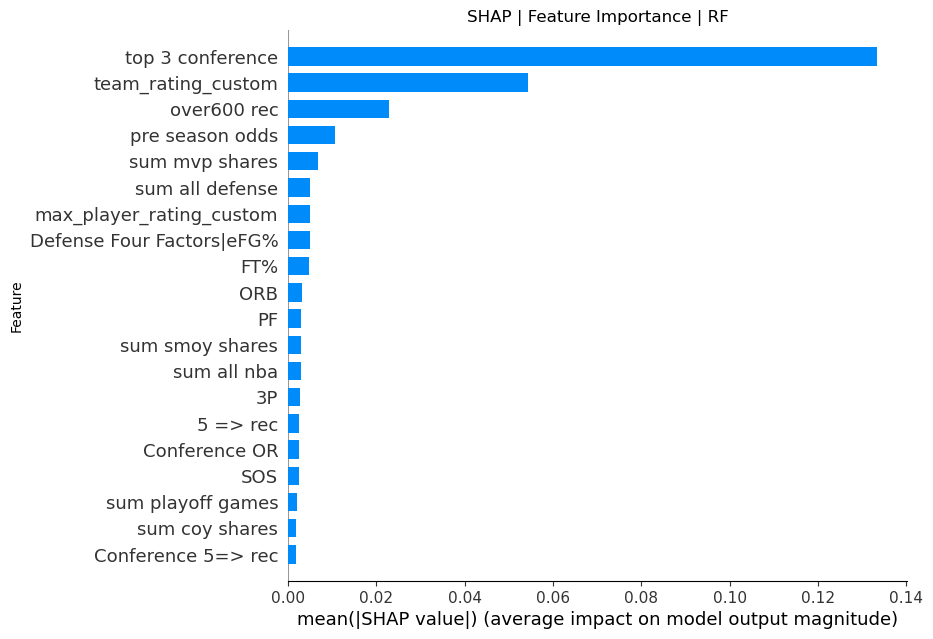

In [17]:
import shap
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np

explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(test[features])

shap.summary_plot(shap_values, test[features], feature_names=features, plot_type="bar", show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Feature Importance | RF')
plt.savefig("rf_shap_bar.png", bbox_inches='tight', pad_inches=1.1)

image = Image.open("rf_shap_bar.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("rf_shap_bar.png")

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1]

top_features_list = [features[index] for index in top_features]
print("Top Features:")
print(top_features_list)

plt.ylabel("Feature")
plt.show()

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Season,1023.0,2007.316716,10.022450,1990.000000,1999.000000,2007.000000,2016.000000,2024.000000
Team ID,1023.0,16.667644,9.736700,1.000000,8.000000,17.000000,25.000000,35.000000
Conference 5=> rec,1023.0,0.499404,0.017545,0.465412,0.485225,0.499299,0.511883,0.538726
Conference OR,1023.0,0.500154,0.023297,0.452033,0.479094,0.500813,0.519164,0.548780
Conference SRS,1023.0,-0.004985,1.010916,-2.043333,-0.985333,0.111333,0.960000,2.048667
...,...,...,...,...,...,...,...,...
Offense Four Factors|FT/FGA,1023.0,0.223853,0.029765,0.143000,0.202000,0.221000,0.244000,0.334000
Defense Four Factors|eFG%,1023.0,0.498724,0.025977,0.423000,0.480000,0.496000,0.514500,0.576000
Defense Four Factors|TOV%,1023.0,13.572727,1.261227,10.300000,12.700000,13.500000,14.400000,19.000000
Defense Four Factors|DRB%,1023.0,72.645748,3.667355,61.500000,69.900000,72.800000,75.500000,81.600000


In [19]:
import pandas as pd

df = pd.read_csv("NBAChampion.csv")

target_stats = df["champion share"].describe()

print("Champion Share Statistics:")
print(target_stats)

print("\nRange of Champion Share:")
print(f"Min: {target_stats['min']}")
print(f"Max: {target_stats['max']}")


Champion Share Statistics:
count    1633.000000
mean        0.191286
std         0.288385
min         0.000000
25%         0.000000
50%         0.000000
75%         0.285714
max         1.000000
Name: champion share, dtype: float64

Range of Champion Share:
Min: 0.0
Max: 1.0


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import schedule
import time

# Load existing NBA dataset
file_path = "NBAChampion.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Define function to scrape or load 2025 NBA data
def get_nba_2025_data():
    url = "https://www.basketball-reference.com/leagues/NBA_2025.html"  # Example URL
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for failed requests
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Identify the correct table
        table = soup.find("table", {"id": "per_game-team"})
        if not table:
            print("Error: Could not find the expected table. The webpage structure may have changed.")
            return None
        
        # Extract column headers
        headers = [th.text.strip() for th in table.find("thead").find_all("th")]
        
        # Extract team data
        rows = table.find("tbody").find_all("tr")
        data = []
        for row in rows:
            cells = row.find_all("td")
            if cells:  # Ensure it's not an empty row
                data.append([cell.text.strip() for cell in cells])
        
        # Create a DataFrame
        if not data:
            print("Error: No data found in the table.")
            return None
        
        nba_2025_df = pd.DataFrame(data, columns=headers[1:])  # Skip first column if it's a rank
        nba_2025_df["Season"] = 2025  # Add season column
        
        return nba_2025_df
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return None

# Function to update NBA data
def update_nba_data():
    print("Checking for new NBA data...")
    nba_2025_df = get_nba_2025_data()
    if nba_2025_df is not None:
        df_updated = pd.concat([df, nba_2025_df], ignore_index=True)
        df_updated.to_csv("Updated_NBAChampion.csv", index=False)
        print("2025 NBA data added and saved as Updated_NBAChampion.csv")
    else:
        print("No new data found.")

# Schedule the script to run daily at noon
schedule.every().day.at("12:00").do(update_nba_data)

while True:
    schedule.run_pending()
    time.sleep(60)  # Check every minute
